In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
df=pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
df.shape

(2290, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
corr = df.corr(numeric_only=True)

<Axes: >

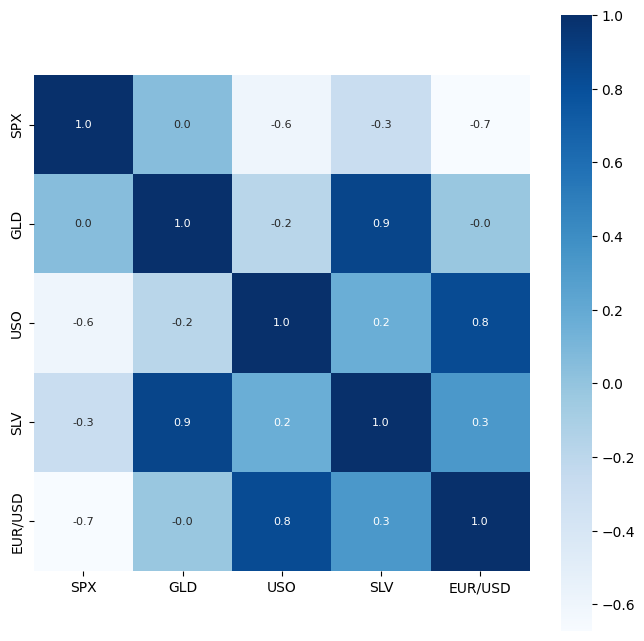

In [16]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':8}, cmap='Blues')

In [17]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


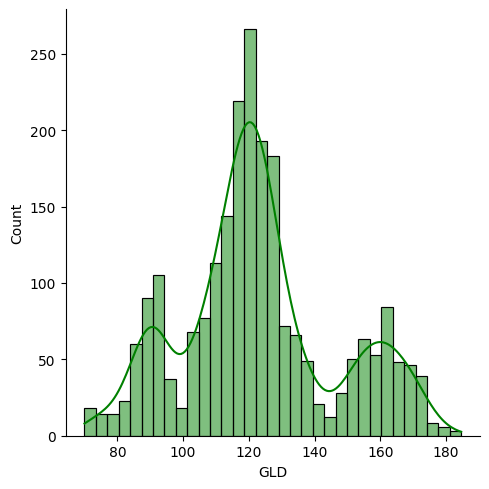

In [20]:
sns.displot(df['GLD'],color='green',kde=True)

In [22]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
test_data_pred=regressor.predict(X_test)
print(test_data_pred)

[168.80399964  82.1855999  116.01720022 127.50060085 120.60850132
 154.83689753 150.3190983  125.86460044 117.46429875 126.06210048
 116.71180116 172.06930082 141.47379857 167.92549861 115.2693004
 117.42570047 140.32810349 169.93260095 159.44280336 158.69499882
 155.25640025 125.63830003 175.82899929 156.82900271 125.09970048
  93.77139996  77.73090005 120.64509991 119.07129922 167.50709946
  88.35750055 125.12400021  91.17640092 117.73810023 121.05049886
 135.71820043 115.75140116 114.71590089 148.55809911 106.89180095
 104.3541027   87.22549816 126.51040072 118.12000025 152.47659918
 119.6368001  108.46780024 108.05729808  93.3124     127.11519788
  75.07960035 113.60709928 121.15280011 111.28629923 118.84969894
 121.07659945 159.17179958 165.98490159 146.82699704  85.60039815
  94.58550017  86.82359876  90.52969987 118.88650091 126.49550082
 127.63799986 169.1228997  122.40439911 117.54019907  98.43570008
 168.43420139 143.07519917 132.28110268 121.16080199 121.06299956
 119.725500

In [31]:
err=metrics.r2_score(y_test,test_data_pred)
print(err)

0.9890686700701748


In [32]:
y_test=list(y_test)

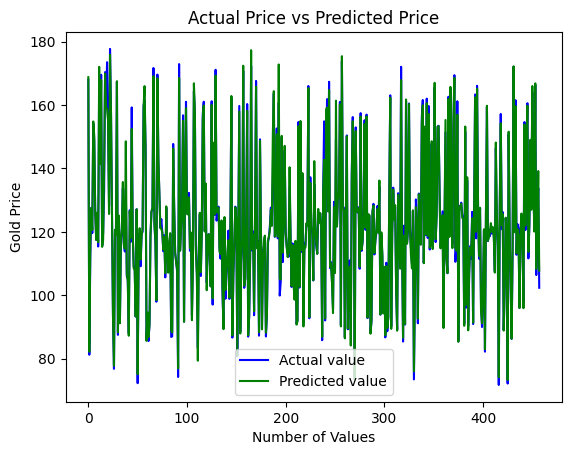

In [33]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_pred,color='green',label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()